In [1]:
# Part 4 확률과 통계
# 13장 순열과 조합
# 13.2 순열과 조합
# 13.2.1 순열
# 순열이란

from itertools import permutations # itertools은 python의 내장 라이브러리입니다
lists = [1, 2, 3]
a = list(permutations(lists, 2)) #순열은 permutations() 함수를 사용합니다
print(list(a))

[(1, 2), (1, 3), (2, 1), (2, 3), (3, 1), (3, 2)]


In [2]:
# 13.2.2 조합
# 조합

from itertools import combinations
lists = [1, 2, 3]
a = list(combinations(lists, 2)) #조합은 combinations () 함수를 사용한다
print(list(a))

[(1, 2), (1, 3), (2, 3)]


In [3]:
# 14장 확률
# 14.2 조건부 확률
# 14.2.3 베이지안 이론(Bayesian theory)
# 베이지안 확률

# 베이지안 확률 예제를 위해 다음의 라이브러리를 설치합니다.
# pip install pandas
# pip install scikit-learn
# pip install nltk
# import nltk
# nltk.download()

import numpy as np 
import pandas as pd 
import nltk
from nltk.corpus import stopwords
import string 

df = pd.read_csv("../spam.csv") # csv 파일이 위치한 경로 설정
df

,num,label,text,label_num
0,1,spam,my free lottery,1
1,2,spam,free lottery free you,1
2,3,ham,your free apple,0
3,4,ham,free to contact me,0
4,5,ham,you won award,0
5,6,spam,your lottery ticket,1


In [4]:
# 텍스트를 정리하고 토큰을 반환하는 함수 생성
def process_text(text):
    # text에서 구두점 삭제
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)

    # text에서 무의미한 단어(접미사, 조사 등) 삭제
    cleaned_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return cleaned_words

# process_text 함수를 적용하여 데이터 세트의 텍스트 데이터를 토큰화
df['text'].head().apply(process_text)

# text를 토큰 수의 행렬로 변환
from sklearn.feature_extraction.text import CountVectorizer
messages_bow = CountVectorizer(analyzer=process_text).fit_transform(df['text'])

#데이터를 80%의 training과 20%의 testing 데이터 셋으로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(messages_bow, df['label_num'], test_size = 0.20, random_state = 0)

# 다항식 나이브 베이지안 모델을 만들고 훈련
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# 데이터 셋 분류에 대한 예측 및 실제값을 보여줌
print(classifier.predict(X_train))  #예측값 출력
print(y_train.values) #실제값 출력


[1 0 1 0]
[1 0 1 0]


In [5]:
# 학습 데이터셋에서 모델의 정확도 표현
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
pred = classifier.predict(X_train)  #X_test값에 대한 예측

# 사이킷런 패키지의 metrics 패키지에서는 정밀도, 재현율, F1점수를 구함
print(classification_report(y_train ,pred ))
print('Confusion Matrix: \n',confusion_matrix(y_train,pred)) # 혼동매트릭스로 표현
print()
print('Accuracy: ', accuracy_score(y_train,pred)) # 정확도 점수로 표현

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

Confusion Matrix: 
 [[2 0]
 [0 2]]

Accuracy:  1.0


In [6]:
print('Predicted value: ',classifier.predict(X_test))

Predicted value:  [1 1]


In [7]:
print('Actual value: ',y_test.values)

Actual value:  [1 0]


In [8]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
pred = classifier.predict(X_test)  
print(classification_report(y_test ,pred ))  
print('Confusion Matrix: \n', confusion_matrix(y_test,pred))
print()
print('Accuracy: ', accuracy_score(y_test,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

Confusion Matrix: 
 [[0 1]
 [0 1]]

Accuracy:  0.5


e:\anaconda3\envs\tensorflow2.0\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
# 15장 통계
# 15.1 확률변수와 확률분포
# 15.1.1 확률변수란
# 베확률 함수(Probability function)

# pip install seaborn
# pip install matplotlib

# 한글깨짐 현상위한 코드

import matplotlib as mpl
import matplotlib.pylab as plt
from matplotlib import font_manager

font_fname = 'C:/Windows/Fonts/malgun.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()

plt.rcParams["font.family"] = font_family

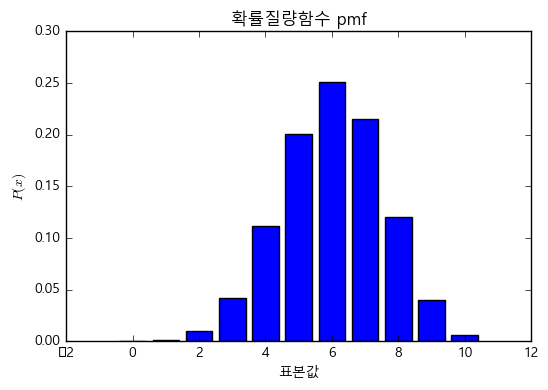

In [10]:
# 확률질량함수 파이썬 예제

import scipy as sp
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt
%matplotlib inline

N = 10 # 전체시도 횟수
mu = 0.6 # 베르누이 확률 분포의 기대값
rv = sp.stats.binom(N, mu)
xx = np.arange(N + 1)
plt.bar(xx, rv.pmf(xx), align="center")  #그래프를 표현할 때에는 matplotlib을 사용한다
plt.xlabel("표본값")
plt.ylabel("$P(x)$")
plt.title("확률질량함수 pmf")
plt.show()

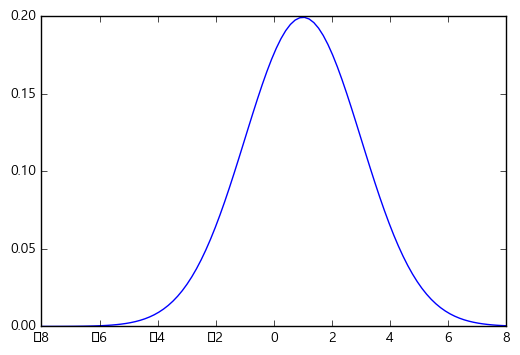

In [11]:
# [확률밀도함수 파이썬 예제]

import scipy as sp
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt
%matplotlib inline

rv = sp.stats.norm()
rv = sp.stats.norm(loc=1, scale=2) 

x = np.linspace(-8, 8, 100)
pdf = rv.pdf(x)
plt.plot(x, pdf)
plt.show()

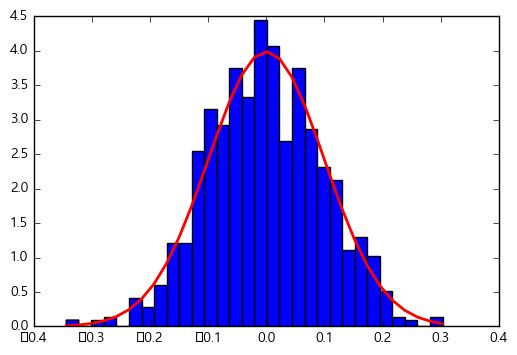

In [12]:
# 15.1.2 확률분포(Probability distribution) 유형
# 정규분포(Normal distribution)와 표준정규분포(Standard normal distribution)

# 정규분포 파이썬 예제
import numpy as np
import matplotlib.pyplot as plt

mu, sigma = 0, 0.1 
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, 30, normed=True)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
plt.show()

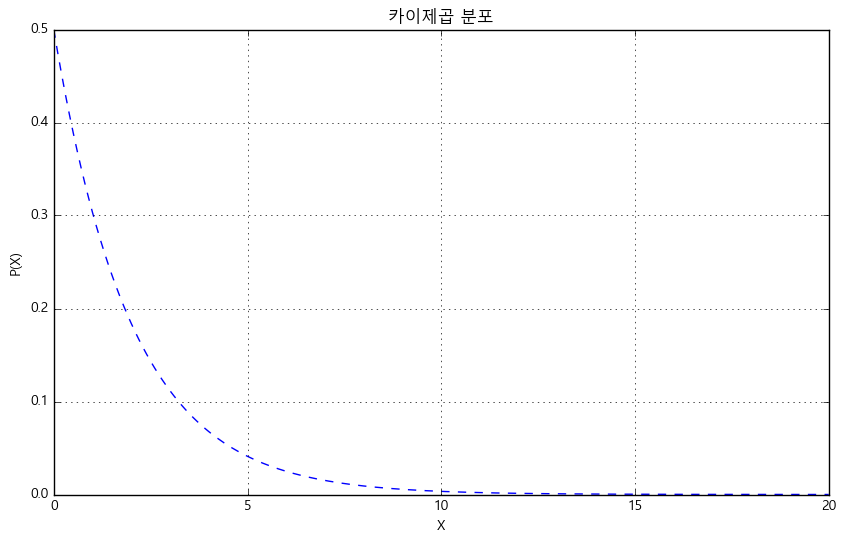

In [13]:
# 카이제곱 분포 파이썬 예제

from numpy import linspace
from scipy.stats import chi2

df = 2          # 자유도
x = linspace(0, 20, 201)  # 0부터 20까지 201개의 구간으로 분할
y = chi2(df).pdf(x)   # 카이제곱 분포의 확률 밀도함수 시각화

plt.figure(figsize=(10, 6)) 
plt.plot(x, y, 'b--')  # plot(x축 데이터, y축 데이터)꼴로 사용
plt.xlabel('X')
plt.ylabel('P(X)')
plt.grid()  # 그리드 형태로 그래프 표현
plt.title(r'카이제곱 분포')
plt.show()

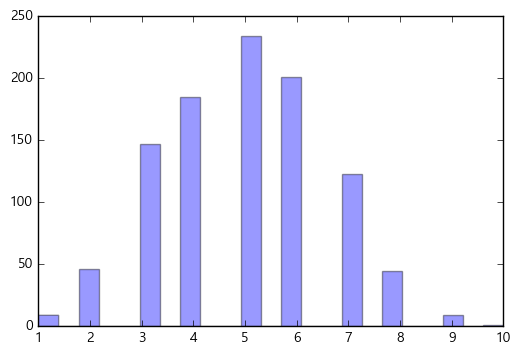

In [14]:
# 이항분포 파이썬 예제

from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(random.binomial(n=10, p=0.5, size=1000), hist=True, kde=False) 
plt.show() 

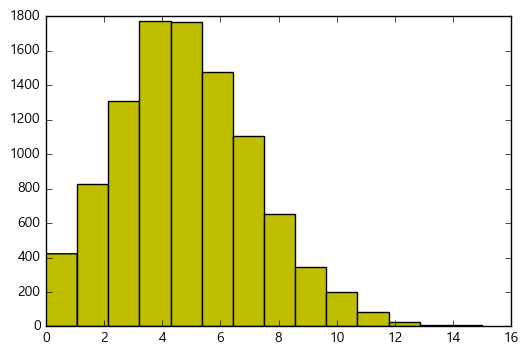

In [15]:
# 푸아송 분포 파이썬 예제

import numpy as np
import matplotlib.pyplot as plt

s = np.random.poisson(5, 10000)
count, bins, ignored = plt.hist(s, 14, color='y')
plt.show()

In [16]:
# 15.3 통계적 검정
# 15.3.1 통계적 가설검정
# 검정방법 선택

import numpy as np
from scipy import stats

np.random.seed(1)
heights = [178 + np.random.normal(0, 5) for _ in range(20)]
tTestResult = stats.ttest_1samp(heights, 173)
print("The T-statistic is %.3f and the p-value is %.3f" % tTestResult)

The T-statistic is 3.435 and the p-value is 0.003


In [17]:
# 15.3.2 분류성능평가
# 혼동행렬

import numpy as np
import sklearn.metrics as metrics

y = np.array([1,1,1,1,0,0]) # 0은 정상, 1은 암환자
p = np.array([1,1,0,0,0,0]) # 예측값

print('accuracy', metrics.accuracy_score(y,p)) # accuracy_score()함수로 정확도 계산
print('precision', metrics.precision_score(y,p) ) # precision_score()함수로 정밀도 계산
print('recall', metrics.recall_score(y,p) ) # recall_score()함수로 재현율 계산
print('f1', metrics.f1_score(y,p) ) # f1_score()함수로 f1스코어 계산

print(metrics.classification_report(y,p)) #정확도, 정밀도, 재현율, f1스코어를 한번에 출력
print(metrics.confusion_matrix(y,p))

accuracy 0.6666666666666666
precision 1.0
recall 0.5
f1 0.6666666666666666
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.50      0.67         4

    accuracy                           0.67         6
   macro avg       0.75      0.75      0.67         6
weighted avg       0.83      0.67      0.67         6

[[2 0]
 [2 2]]


e:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


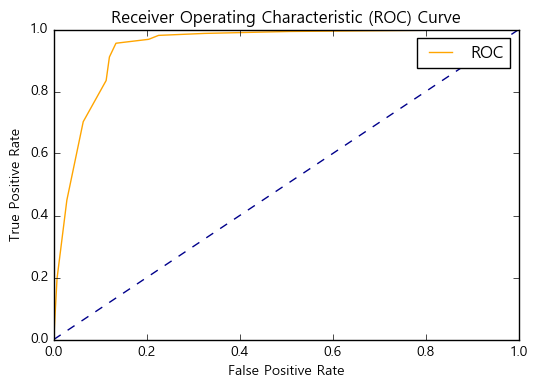

In [18]:
# ROC 커브(curve)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# roc curve and auc score
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

data_X, class_label = make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state=1)

# 임의로 생성된 데이터를 학습과 테스트로 분리
trainX, testX, trainy, testy = train_test_split(data_X, class_label, test_size=0.3, random_state=1)

model = RandomForestClassifier()
model.fit(trainX, trainy)
probs = model.predict_proba(testX)
probs = probs[:, 1]
auc = roc_auc_score(testy, probs)
fpr, tpr, thresholds = roc_curve(testy, probs)
fpr, tpr, thresholds = roc_curve(testy, probs)
plot_roc_curve(fpr, tpr)